In [1]:
import os
os.chdir("../../..")
import deepof.data

In [2]:
%load_ext autoreload
%autoreload 2

# Formatting your data: feature extraction from motion tracking output

In [3]:
# Create and run a project. Explore different processing parameters (smoothing, imputation)

In [4]:
my_deepof_project = deepof.data.Project(
                path=os.path.join("../../Desktop/deepOF_CSDS_tutorial_dataset/"),
                arena="circular-autodetect",
                animal_ids=["B", "W"],
                video_format=".mp4",
                exclude_bodyparts=["Tail_1", "Tail_2", "Tail_tip"],
                video_scale=380,
                enable_iterative_imputation=False,
                exp_conditions={
                    '20191204_Day2_SI_JB08_Test_56': 'Stressed',
                    '20191204_Day2_SI_JB08_Test_61': 'Stressed',
                    '20191204_Day2_SI_JB08_Test_62': 'Stressed',
                    '20191204_Day2_SI_JB08_Test_54': 'Nonstressed',
                    '20191204_Day2_SI_JB08_Test_63': 'Nonstressed',
                    '20191204_Day2_SI_JB08_Test_64': 'Nonstressed'
                }
)

# Set manually the edge in the polygons that we're measuring

In [ ]:
my_deepof_project = my_deepof_project.run()

In [ ]:
# Save your project to avoid laborious repetitions

In [ ]:
my_deepof_project.save("../../Desktop/deepOF_CSDS_tutorial_dataset/deepof_tutorial_saved_coordinates")

In [5]:
# Load a previously saved project
my_deepof_project = deepof.data.load("../../Desktop/deepOF_CSDS_tutorial_dataset/deepof_tutorial_saved_coordinates_1667951748.pkl")

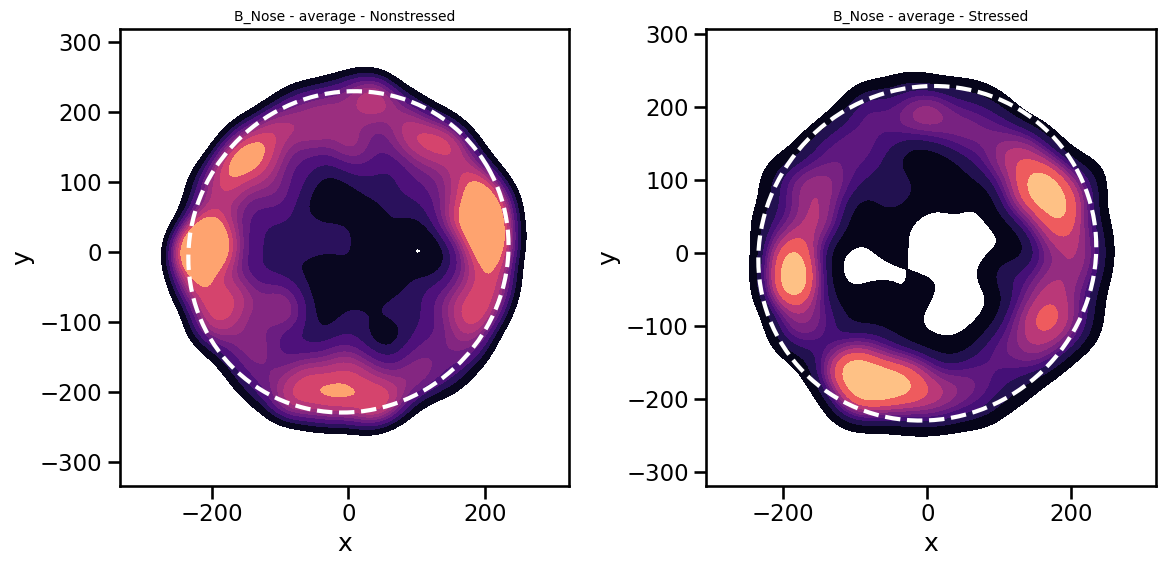

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import deepof.visuals
from matplotlib.patches import Ellipse

sns.set_context("talk")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

deepof.visuals.plot_heatmaps(
    my_deepof_project, 
    ["B_Nose"],
    center="arena", 
    exp_condition="Nonstressed",
    ax=ax1,
    show=False,
    display_arena=True,
    experiment_id="average",
)

deepof.visuals.plot_heatmaps(
    my_deepof_project, 
    ["B_Nose"],
    center="arena", 
    exp_condition="Stressed",
    ax=ax2,
    show=False,
    display_arena=True,
    experiment_id="average",
)

plt.tight_layout()
plt.show()

In [10]:
# Multi animal display

In [8]:
from sklearn.decomposition import PCA
emb = PCA(n_components=3).fit_transform(my_deepof_project.get_coords()['20191204_Day2_SI_JB08_Test_56'])

In [9]:
from IPython import display

video = deepof.visuals.animate_skeleton(
    my_deepof_project,
    embedding=emb,
    experiment_id="20191204_Day2_SI_JB08_Test_56",
    frame_limit=750,
    dpi=60,
)

html = display.HTML(video)
display.display(html)
plt.close()

In [11]:
# Single animal display

In [12]:
emb = PCA(n_components=3).fit_transform(my_deepof_project.get_coords().filter_id("B")['20191204_Day2_SI_JB08_Test_56'])

In [13]:
from IPython import display

video = deepof.visuals.animate_skeleton(
    my_deepof_project,
    animal_id="B",
    embedding=emb,
    experiment_id="20191204_Day2_SI_JB08_Test_56",
    frame_limit=750,
    dpi=60,
)

html = display.HTML(video)
display.display(html)
plt.close()

In [14]:
emb = PCA(n_components=3).fit_transform(my_deepof_project.get_coords(center="Center", align="Spine_1").filter_id("B")['20191204_Day2_SI_JB08_Test_56'])

In [23]:
from IPython import display

video = deepof.visuals.animate_skeleton(
    my_deepof_project,
    center="Center",
    align="Spine_1",
    animal_id="B",
    embedding=emb,
    experiment_id="20191204_Day2_SI_JB08_Test_56",
    frame_limit=750,
    dpi=60,
)

html = display.HTML(video)
display.display(html)
plt.close()

In [ ]:
# Get and plot coordinates, distances, angles, and areas. Try and visualizing different centering and rotations

In [18]:
my_deepof_project.get_coords()['20191204_Day2_SI_JB08_Test_54']

B_Center             B_Left_bhip             B_Left_ear              \
                x           y           x          y           x           y   
0      -69.806717 -114.875885  -70.839065 -96.200577 -101.147018 -132.390334   
1      -70.918152 -113.697891  -71.659241 -95.482407 -100.246841 -134.301665   
2      -72.452667 -112.753281  -73.145782 -95.873840  -95.234802 -139.330383   
3      -74.532791 -114.299744  -76.881561 -97.001678  -90.826645 -145.633514   
4      -73.597458 -116.541931  -78.519974 -98.518539  -86.243912 -148.463943   
...           ...         ...         ...        ...         ...         ...   
14994 -184.633353    3.971861 -165.601647  -1.932342 -186.422356   40.902678   
14995 -184.394404   11.532362 -165.469918   3.013032 -188.428966   51.229231   
14996 -184.155454   19.092862 -168.284959  12.241029 -190.435577   61.555784   
14997 -184.155454   19.092862 -168.284959  12.241029 -190.435577   61.555784   
14998 -184.155454   19.092862 -168.284959  12.241029 -190.435577   61.555784   

      B_Left_fhip                  B_Nose              ... W_Right_ear  \
                x           y           x           y  ...           x   
0      -91.290282 -111.490814 -104.701996 -151.677919  ...  110.454162   
1      -91.158599 -110.923141  -98.455688 -153.064546  ...  123.458343   
2      -91.907104 -114.432449  -87.764694 -156.499024  ...  130.608643   
3      -93.351761 -117.227264  -78.010361 -160.718934  ...  138.088959   
4      -91.274292 -121.203339  -71.737839 -165.336121  ...  144.052887   
...           ...         ...         ...         ...  ...         ...   
14994 -174.442719   19.548034 -201.657472   61.831938  ...  -35.742859   
14995 -172.714783   24.409210 -199.566110   68.135740  ...  -35.807709   
14996 -173.978836   35.388275 -206.396380   78.042506  ...  -35.863770   
14997 -173.978836   35.388275 -206.396380   78.042506  ...  -35.863770   
14998 -173.978836   35.388275 -206.396380   78.042506  ...  -35.863770   

                  W_Right_fhip               W_Spine_1              W_Spine_2  \
                y            x           y           x           y          x   
0     -146.147599    76.927610 -168.448122   93.539948 -170.497452  57.616668   
1     -140.602754    86.573483 -159.572649  105.973297 -163.989319  62.204527   
2     -135.306855    95.386139 -155.283615  112.960632 -161.103622  74.657746   
3     -130.937577   104.516999 -151.063202  122.465393 -156.342804  84.510926   
4     -124.055817   114.323181 -148.511963  134.606567 -153.441727  94.552643   
...           ...          ...         ...         ...         ...        ...   
14994  161.909302   -37.381119  183.050293  -50.765808  177.017945 -38.980179   
14995  161.843323   -37.377167  182.982330  -50.825577  176.946900 -39.030304   
14996  161.909119   -37.407684  183.039795  -50.874924  176.990845 -38.964523   
14997  161.909119   -37.407684  183.039795  -50.874924  176.990845 -38.964523   
14998  161.909119   -37.407684  183.039795  -50.874924  176.990845 -38.964523   

                  W_Tail_base              
                y           x           y  
0     -195.670273   28.353759 -201.394004  
1     -191.096817   39.379546 -200.161888  
2     -186.134789   57.856689 -197.852341  
3     -184.281303   68.710663 -197.081413  
4     -180.663757   76.073914 -192.553886  
...           ...         ...         ...  
14994  209.485565  -25.103607  218.758606  
14995  209.532623  -25.144684  218.770020  
14996  209.587433  -25.038025  218.801758  
14997  209.587433  -25.038025  218.801758  
14998  209.587433  -25.038025  218.801758  

[14999 rows x 44 columns]

In [20]:
my_deepof_project.get_distances()['20191204_Day2_SI_JB08_Test_54']

,"(B_Center, B_Left_bhip)","(B_Center, B_Left_ear)","(B_Center, B_Left_fhip)","(B_Center, B_Nose)","(B_Center, B_Right_bhip)","(B_Center, B_Right_ear)","(B_Center, B_Right_fhip)","(B_Center, B_Spine_1)","(B_Center, B_Spine_2)","(B_Center, B_Tail_base)",...,"(W_Right_ear, W_Right_fhip)","(W_Right_ear, W_Spine_1)","(W_Right_ear, W_Spine_2)","(W_Right_ear, W_Tail_base)","(W_Right_fhip, W_Spine_1)","(W_Right_fhip, W_Spine_2)","(W_Right_fhip, W_Tail_base)","(W_Spine_1, W_Spine_2)","(W_Spine_1, W_Tail_base)","(W_Spine_2, W_Tail_base)"
0,15.450982,29.658367,17.966248,41.895480,15.803508,24.991267,13.509670,14.077582,13.663915,28.411640,...,33.263138,24.491855,59.823162,81.747728,13.827262,27.571486,48.485395,36.236443,59.591947,24.631787
1,15.060022,29.609053,16.876755,39.687005,16.198662,24.627048,13.674015,13.609921,13.982763,28.611096,...,34.263691,24.121997,65.577363,85.117165,16.436012,32.915385,51.421866,42.529615,62.603999,20.288051
2,13.955636,28.917387,16.130809,38.287577,16.481683,24.196283,14.335269,13.585866,14.107540,29.009490,...,33.450868,25.820015,62.444643,79.256078,15.293440,30.704010,46.880387,37.798966,54.714857,16.921208
3,14.420833,29.174964,15.733085,38.453746,17.863309,24.357411,14.897995,12.570955,14.390999,30.255979,...,32.334919,24.637916,62.456538,79.185315,15.455092,32.033488,48.167100,38.932290,55.717745,16.798050
4,15.434210,28.364362,15.101791,40.337507,17.834842,25.069009,15.415200,12.422415,13.997332,29.282028,...,31.801220,25.498732,62.120053,79.721142,17.243629,31.179854,48.187837,40.006461,58.154601,18.152095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,16.461023,30.543840,15.376454,49.823448,15.469405,30.661973,12.617571,14.360077,17.206808,32.060226,...,17.516655,17.600889,39.393012,47.777809,12.127990,21.877749,31.193080,28.533472,40.476839,13.787204
14995,17.144342,32.961999,14.361249,48.409845,16.855279,29.075371,10.783199,12.448693,19.994702,34.762151,...,17.510722,17.594962,39.485354,47.844264,12.177042,21.975325,31.243045,28.627910,40.542961,13.777088
14996,14.280084,35.459629,15.870849,52.048194,15.246060,32.946111,12.648262,16.055377,18.003094,33.654249,...,17.502308,17.578253,39.469639,47.841556,12.195806,21.968335,31.259795,28.668850,40.601966,13.794691
14997,14.280084,35.459629,15.870849,52.048194,15.246060,32.946111,12.648262,16.055377,18.003094,33.654249,...,17.502308,17.578253,39.469639,47.841556,12.195806,21.968335,31.259795,28.668850,40.601966,13.794691


In [21]:
my_deepof_project.get_angles()['20191204_Day2_SI_JB08_Test_54']

,"(B_Right_fhip, B_Center, B_Spine_1)","(B_Right_fhip, B_Spine_1, B_Center)","(B_Center, B_Right_fhip, B_Spine_1)","(B_Spine_2, B_Left_bhip, B_Center)","(B_Spine_2, B_Center, B_Left_bhip)","(B_Left_bhip, B_Spine_2, B_Center)","(B_Spine_2, B_Left_bhip, B_Tail_base)","(B_Spine_2, B_Tail_base, B_Left_bhip)","(B_Left_bhip, B_Spine_2, B_Tail_base)","(B_Spine_2, B_Right_bhip, B_Center)",...,"(W_Spine_1, W_Nose, W_Right_ear)","(W_Nose, W_Spine_1, W_Left_ear)","(W_Nose, W_Left_ear, W_Spine_1)","(W_Spine_1, W_Nose, W_Left_ear)","(W_Nose, W_Right_ear, W_Left_ear)","(W_Nose, W_Left_ear, W_Right_ear)","(W_Right_ear, W_Nose, W_Left_ear)","(W_Spine_1, W_Right_ear, W_Left_ear)","(W_Spine_1, W_Left_ear, W_Right_ear)","(W_Right_ear, W_Spine_1, W_Left_ear)"
0,1.342828,0.263880,1.534884,1.187925,0.169241,1.784427,1.885301,0.144641,1.111650,1.226048,...,0.709938,1.289859,1.186949,0.664785,1.249976,1.167471,0.724146,1.110643,1.284647,0.746303
1,1.296478,0.310017,1.535098,1.253869,0.215074,1.672650,1.325641,0.207864,1.608087,1.716381,...,0.830239,1.198471,1.141249,0.801873,1.262406,1.061232,0.817955,1.221417,1.199947,0.720229
2,1.433251,0.296421,1.411920,1.394147,0.171977,1.575469,0.829132,0.070146,2.242315,1.542708,...,0.790422,1.174485,1.227785,0.739322,1.154881,1.179489,0.807223,1.157367,1.273725,0.710501
3,1.363800,0.279533,1.498259,1.183406,0.181494,1.776692,1.825084,0.143918,1.172591,1.227019,...,0.717499,1.326229,1.146248,0.669116,1.279602,1.132725,0.729266,1.140828,1.242579,0.758186
4,1.286837,0.326833,1.527923,1.223879,0.225428,1.692285,1.291835,0.217736,1.632021,1.650631,...,0.849957,1.234473,1.090307,0.816812,1.301660,1.013340,0.826592,1.262939,1.156195,0.722459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.888055,1.576634,0.676904,0.708756,1.668452,0.764385,0.681275,1.623151,0.837167,0.787151,...,0.604743,0.126495,2.507369,0.507728,0.033657,2.947038,0.160898,0.114363,2.246633,0.780596
14995,0.946506,1.519524,0.675562,0.725358,1.637007,0.779227,0.592961,1.646513,0.902118,0.840468,...,0.740574,0.057316,2.809126,0.275150,0.011783,3.089942,0.039868,0.004496,3.125017,0.012080
14996,0.904947,1.542495,0.694150,0.682433,1.658796,0.800364,0.666630,1.539205,0.935758,0.761114,...,0.420803,0.107398,2.583923,0.450271,0.089352,2.638471,0.413769,0.082564,2.468126,0.590902
14997,0.890707,1.568186,0.682699,0.705665,1.678581,0.757347,0.678188,1.633899,0.829506,0.784100,...,0.626249,0.136933,2.465188,0.539471,0.045918,2.880332,0.215342,0.096096,2.376721,0.668775


In [ ]:
my_deepof_project.get_areas()['20191204_Day2_SI_JB08_Test_54']

In [ ]:
# Show how to merge different feature objects